In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.style.use("ggplot")

# LOAD DATA

In [3]:
path = "./data/Canada.xlsx"
df = pd.read_excel(path,
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2,
                    )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [5]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [6]:
df.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1, inplace=True)
df.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [7]:
df.rename(columns={"OdName":"Country", "AreaName": "Continent", "regName": "Region"}, inplace=True)
df.columns

Index([  'Country', 'Continent',   'RegName',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
df.columns = list(map(str, df.columns))
print(df.columns)

Index(['Country', 'Continent', 'RegName', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')


In [9]:
df.set_index("Country", inplace=True)

In [10]:
df

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


In [11]:
df["Total"] = df.iloc[:, 3:].sum(axis=1)
df["Total"]

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

In [12]:
df.columns

Index(['Continent', 'RegName', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [13]:
years = list(map(str, range(1980, 2014)))
# years = list(str(i) for i in range(1980, 2014))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Line plot

In [14]:
haiti = df.loc["Haiti", years]
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

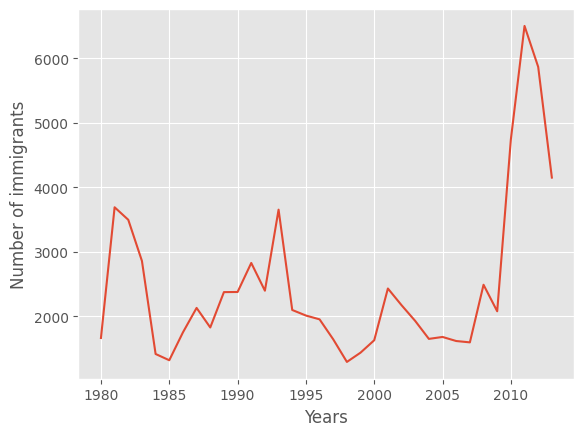

In [15]:
haiti.index = haiti.index.map(int)
haiti.plot(kind="line")

plt.xlabel("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

plt.show()

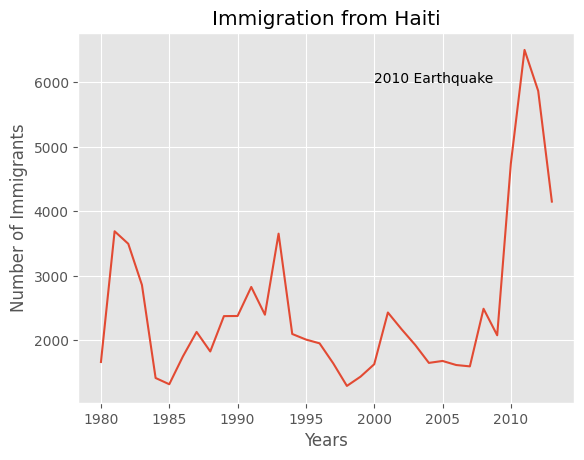

In [16]:
haiti.plot(kind="line")

plt.title("Immigration from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.text(2000, 6000, "2010 Earthquake")

plt.show()

In [17]:
df_CI = df.loc[["India", "China"], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [18]:
df_CI = df_CI.transpose()
df_CI

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


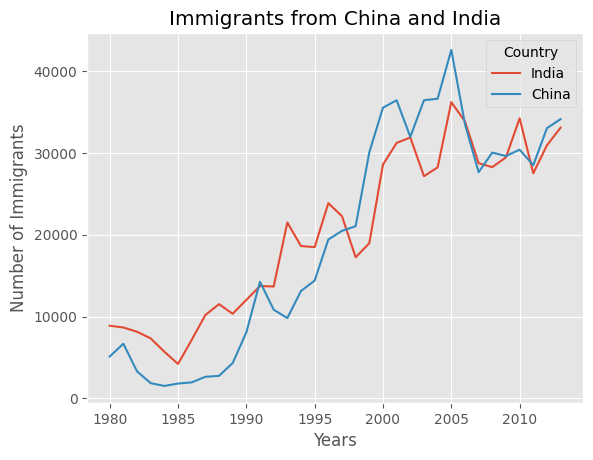

In [19]:
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind="line")
plt.title("Immigrants from China and India")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")
plt.show()

# Area plot

In [20]:
df.sort_values(["Total"], ascending=False, axis=0, inplace=True)
df_top5 = df.head()
df_top5

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [21]:
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


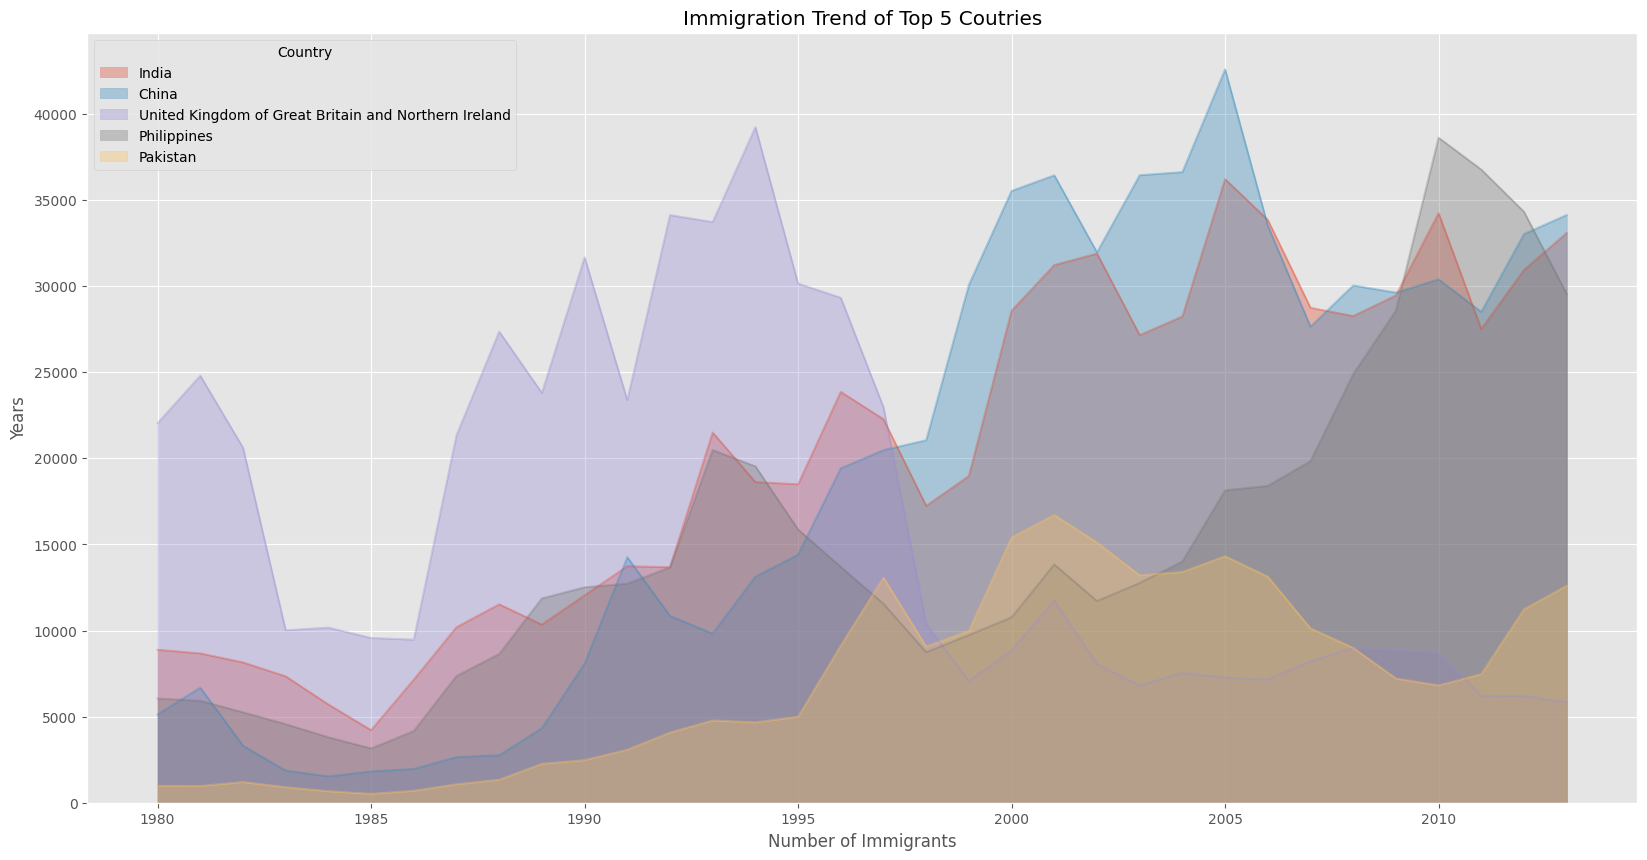

In [22]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="area",
            alpha=0.35,
            stacked=False,
            figsize=(20,10),)

plt.title("Immigration Trend of Top 5 Coutries")
plt.xlabel("Number of Immigrants")
plt.ylabel("Years")
plt.show()

Text(0.5, 0, 'Years')

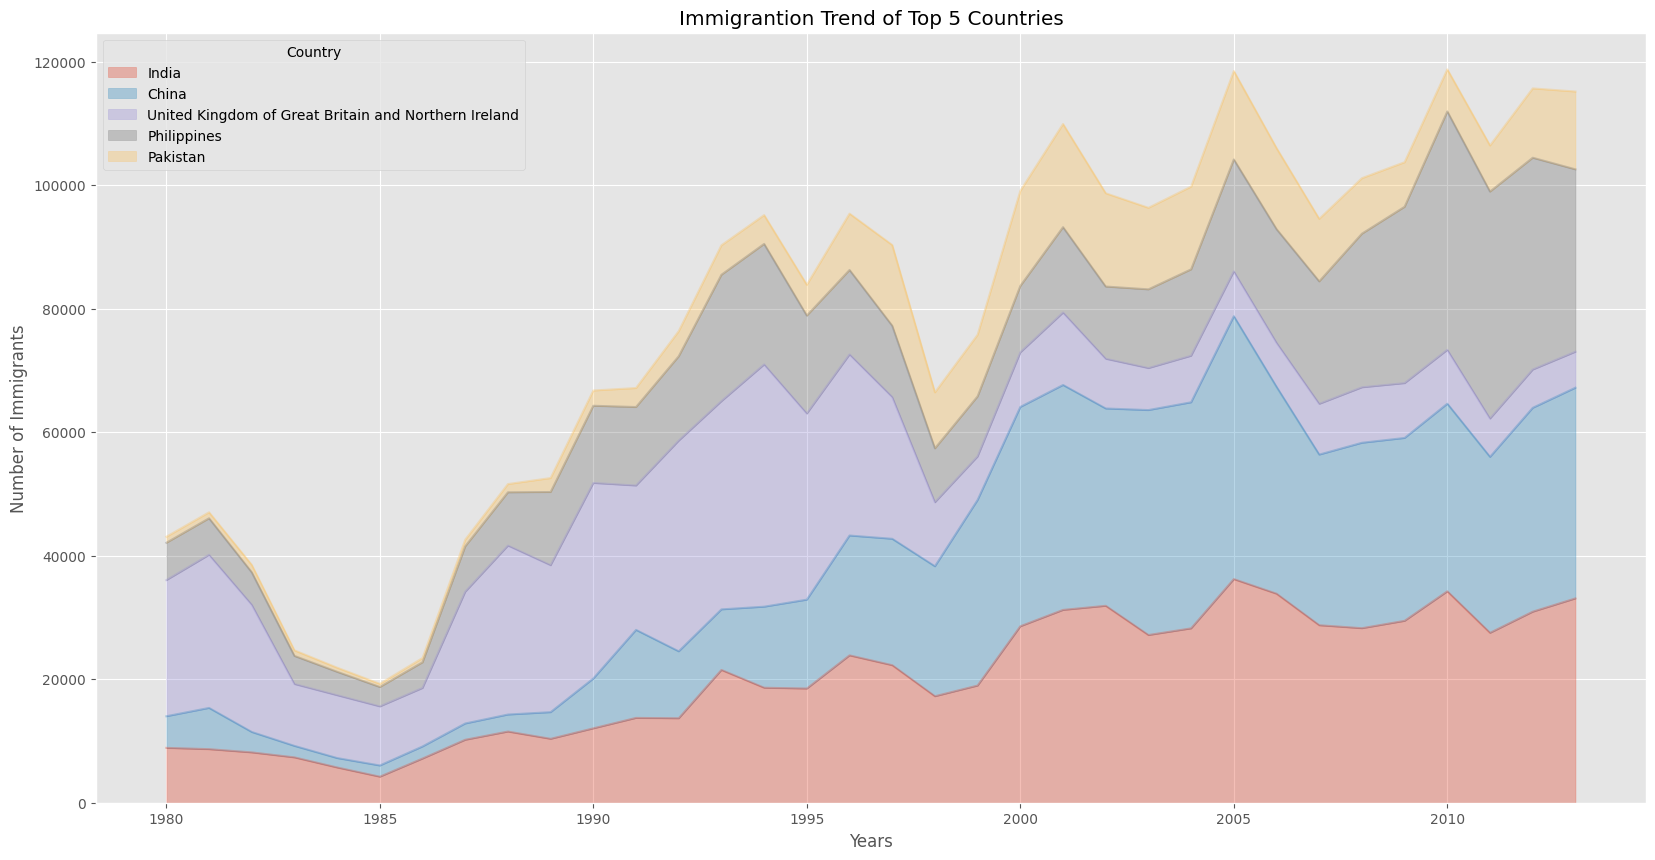

In [23]:
# With stacking
ax = df_top5.plot(kind="area", alpha=0.35, figsize=(20,10))
ax.set_title("Immigrantion Trend of Top 5 Countries")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

In [24]:
df["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

# Histogram

In [25]:
count, bin_edges = np.histogram(df["2013"])
print(f"Count: {count}")
print(f"Bin edge: {bin_edges}")

Count: [178  11   1   2   0   0   0   0   1   2]
Bin edge: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


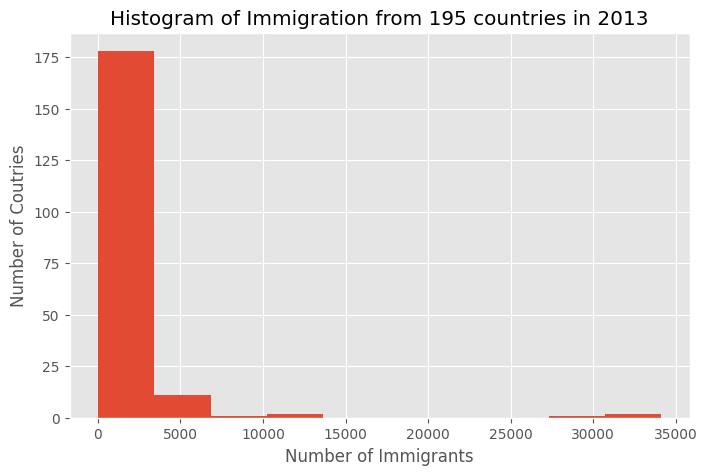

In [26]:
df["2013"].plot(kind="hist", figsize=(8, 5))
plt.title("Histogram of Immigration from 195 countries in 2013")
plt.ylabel("Number of Coutries")
plt.xlabel("Number of Immigrants")
plt.show()

In [27]:
df_t = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_t

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


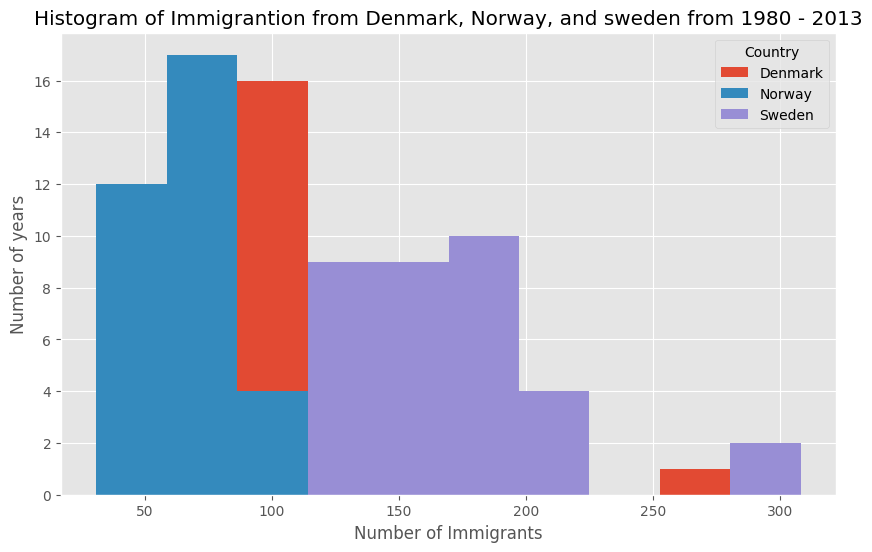

In [28]:
df_t.plot(kind="hist", figsize=(10, 6))
plt.title("Histogram of Immigrantion from Denmark, Norway, and sweden from 1980 - 2013")
plt.ylabel("Number of years")
plt.xlabel("Number of Immigrants")
plt.show()

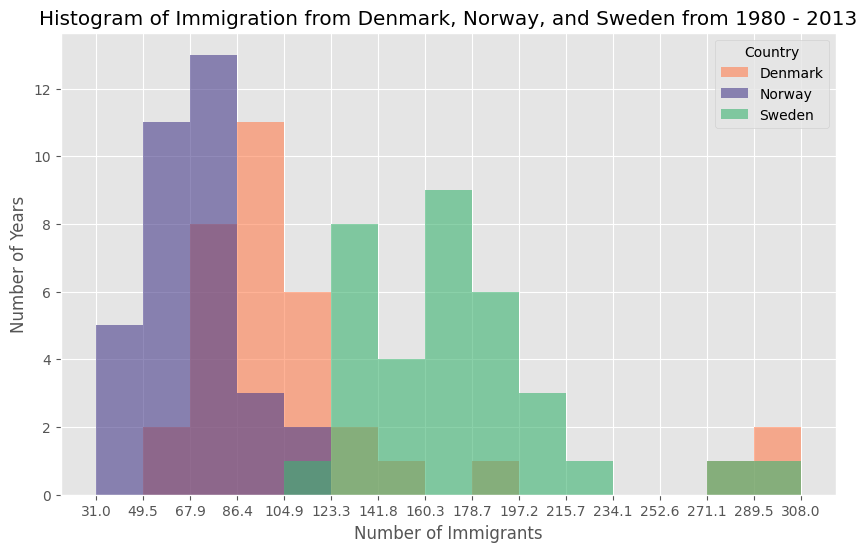

In [29]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind="hist",
        figsize=(10, 6),
        bins=15,
        alpha=0.6,
        xticks=bin_edges,
        color=["coral", "darkslateblue", "mediumseagreen"])

plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

# Bar chart

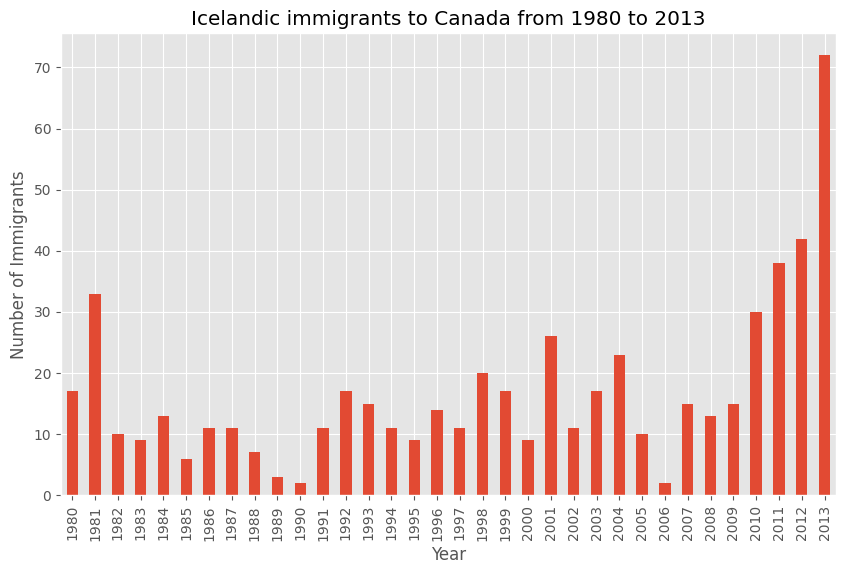

In [30]:
df_iceland = df.loc["Iceland", years]
df_iceland.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic immigrants to Canada from 1980 to 2013")
plt.show()

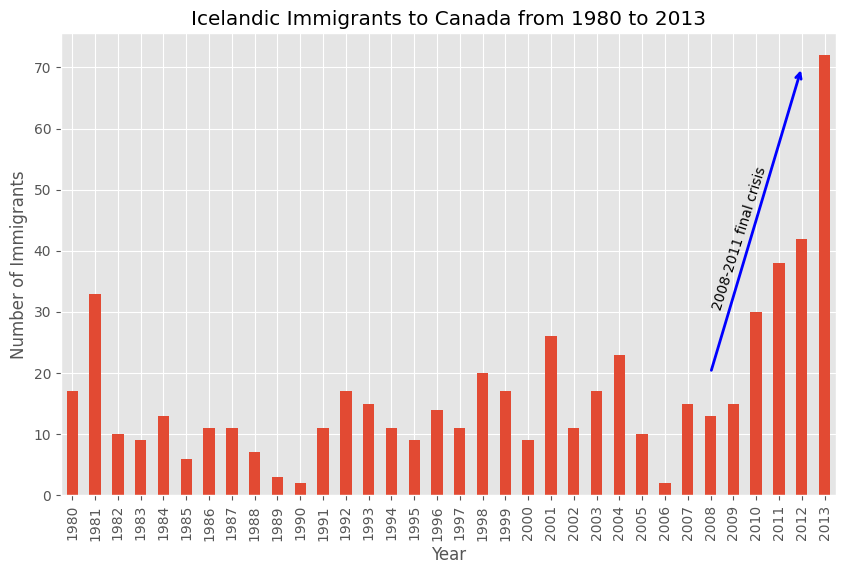

In [31]:
df_iceland.plot(kind="bar", figsize=(10, 6), rot=90)
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic Immigrants to Canada from 1980 to 2013")

# Annotate arrow
plt.annotate('',
            
            xy=(32, 70),
            xytext=(28, 20),
            xycoords="data",
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2),
            )

# Annotate text
plt.annotate("2008-2011 final crisis",
            xy=(28, 30),
            rotation=72.5,
            va="bottom",
            ha="left",)
plt.show()

In [32]:
df.sort_values(by="Total", ascending=True, inplace=True)
df["Total"]

Country
Palau                                                        1
Marshall Islands                                             2
Western Sahara                                               2
San Marino                                                   5
New Caledonia                                                5
                                                         ...  
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, Length: 195, dtype: int64

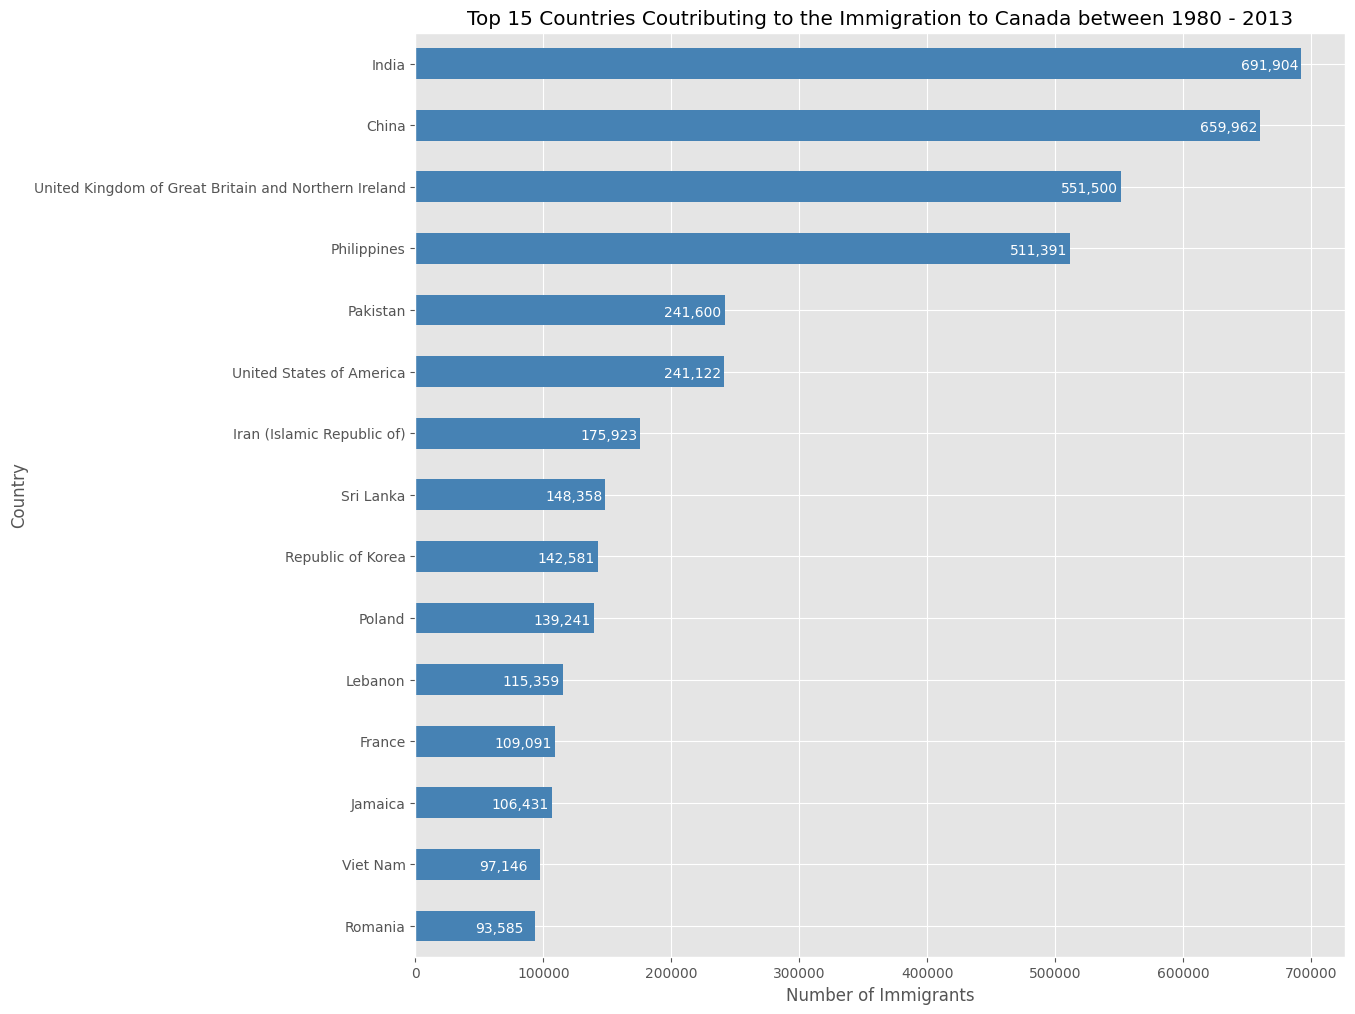

In [33]:
df_top15 = df["Total"].tail(15)
df_top15.plot(kind="barh", figsize=(12, 12), color="steelblue")
plt.xlabel("Number of Immigrants")
plt.title("Top 15 Countries Coutributing to the Immigration to Canada between 1980 - 2013")
for idx, value in enumerate(df_top15):
    label = format(int(value), ',')
    plt.annotate(label,
                xy=(value-47000, idx - 0.1), color="white")

plt.show()

# Pie chart

In [34]:
df_continents = df.groupby("Continent", axis=0).sum()
df_continents

/tmp/ipykernel_1172706/377880353.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby("Continent", axis=0).sum()


,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaMiddle AfricaWeste...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaEastern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeWe...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,MicronesiaMicronesiaMelanesiaPolynesiaPolynesi...,Developing regionsDeveloping regionsDeveloping...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


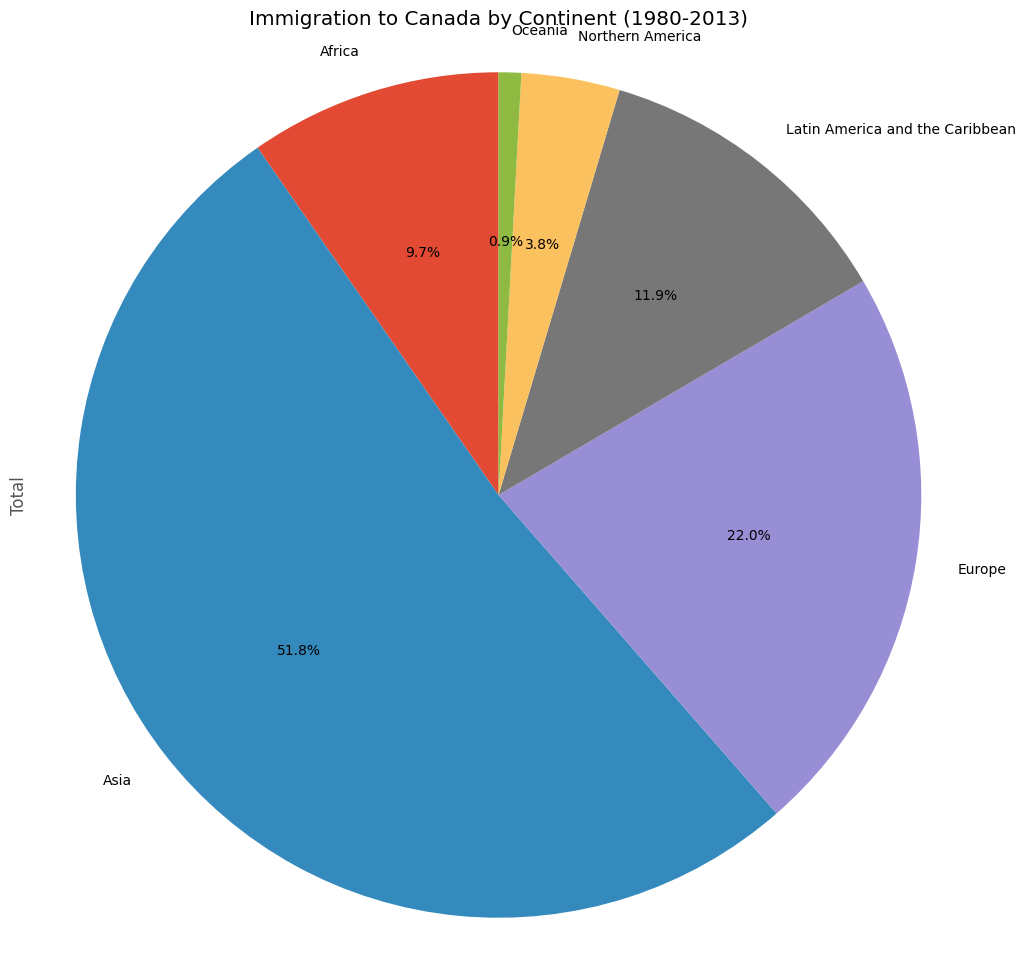

In [35]:
df_continents["Total"].plot(kind="pie",
                            figsize=(12,12),
                            autopct="%.1f%%",
                            startangle=90,
                            shadow=False,)

plt.title("Immigration to Canada by Continent (1980-2013)")
plt.axis("Equal")
plt.show()

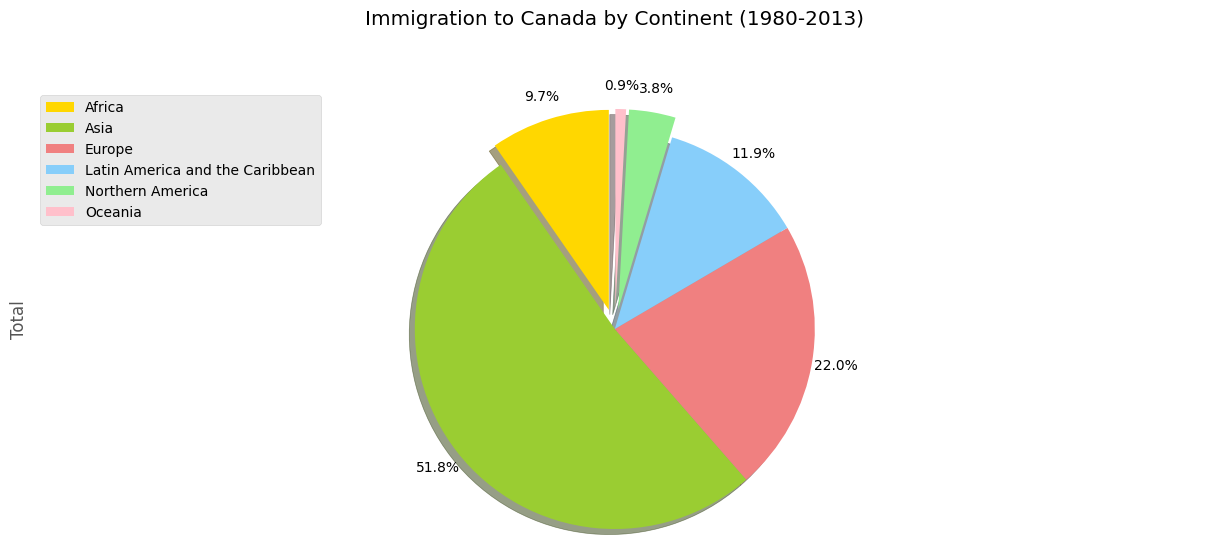

In [36]:
colors_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents["Total"].plot(kind="pie",
                            figsize=(15, 6),
                            autopct="%.1f%%",
                            startangle=90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list,)
plt.title("Immigration to Canada by Continent (1980-2013)", y=1.12)
plt.axis("Equal")
plt.legend(labels=df_continents.index, loc="upper left")
plt.show()

# Plot box

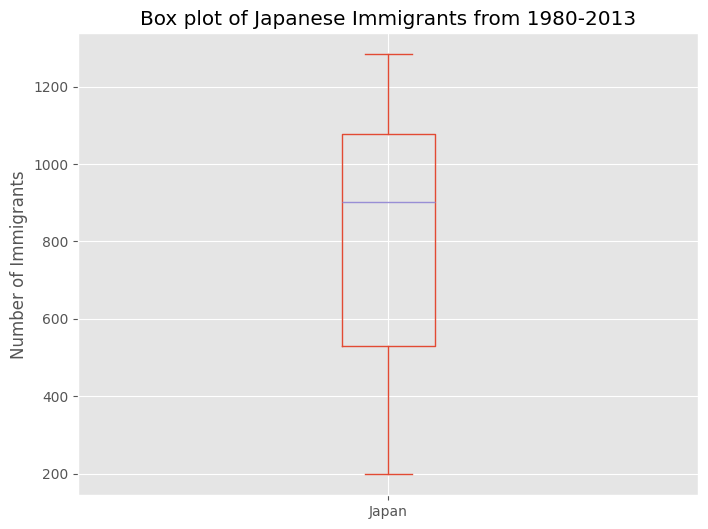

In [37]:
df_japan = df.loc[["Japan"], years].transpose()
df_japan.plot(kind="box", figsize=(8, 6))

plt.title("Box plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

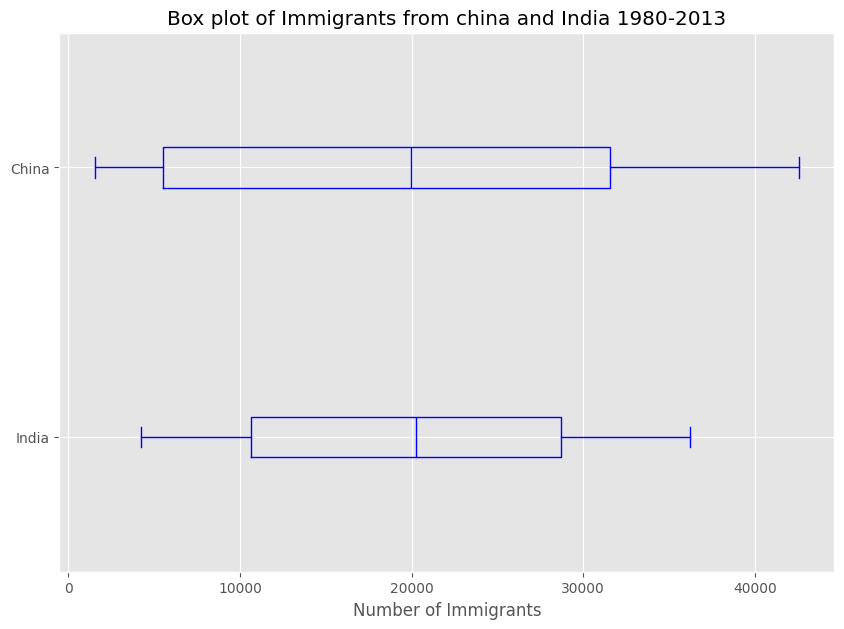

In [38]:
df_CI.plot(kind="box", figsize=(10, 7), color="blue", vert=False)
plt.title("Box plot of Immigrants from china and India 1980-2013")
plt.xlabel("Number of Immigrants")

plt.show()

# Subplot

Text(0.5, 0, 'Years')

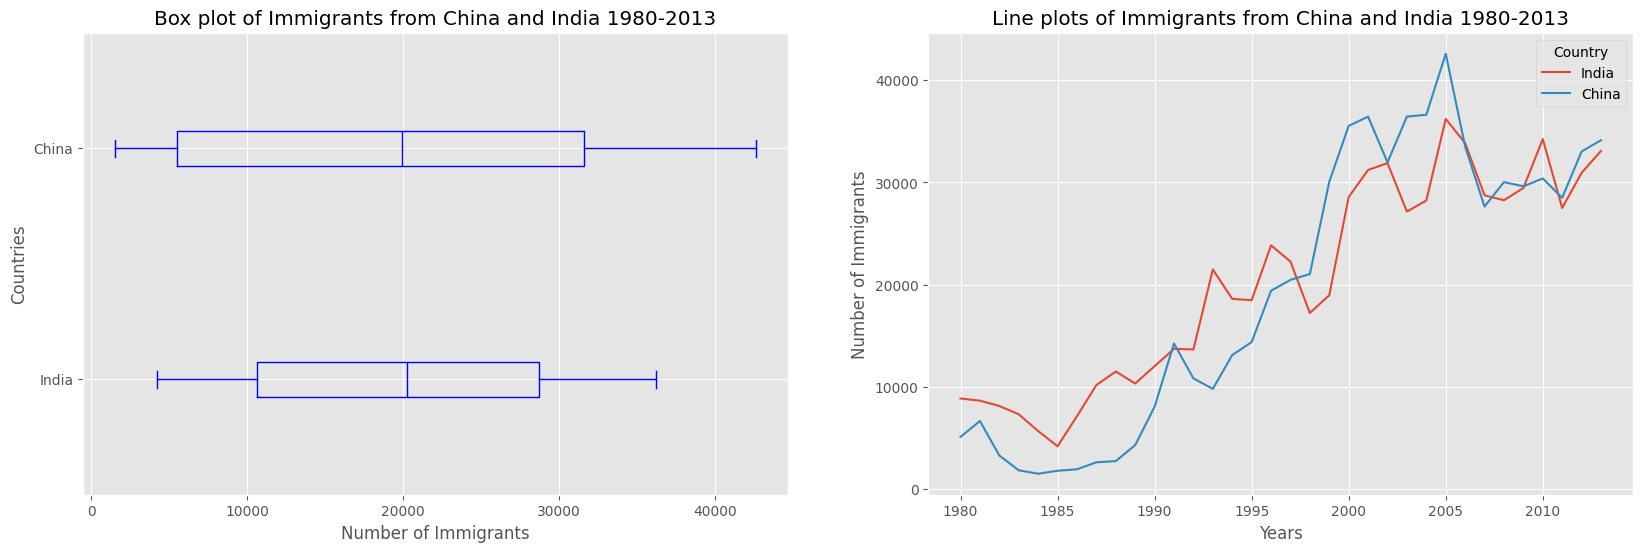

In [39]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Plot 1
df_CI.plot(kind="box", color="blue", vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title("Box plot of Immigrants from China and India 1980-2013")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

# Plot 2
df_CI.plot(kind="line", figsize=(20, 6), ax=ax1)
ax1.set_title("Line plots of Immigrants from China and India 1980-2013")
ax1.set_ylabel("Number of Immigrants")
ax1.set_xlabel("Years")

In [40]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=["year", "total"]
df_tot

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


# Scatter plot

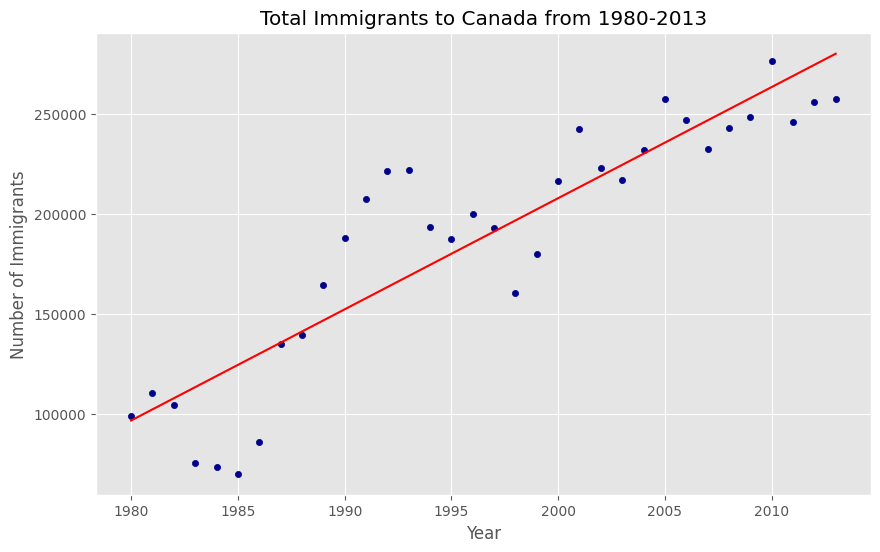

In [41]:
x = df_tot["year"]
y = df_tot["total"]
fit = np.polyfit(x, y, deg=1)

df_tot.plot(kind="scatter", 
            x="year", 
            y="total", 
            figsize=(10, 6), 
            color="darkblue")

plt.title("Total Immigrants to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

# Plot line of best fit
plt.plot(x, fit[0]*x+fit[1], color="red")
plt.annotate(f"y={fit[0]:.1f}*x+{fit[1]:.0f}", xy=(2000, 1500000))
plt.show()

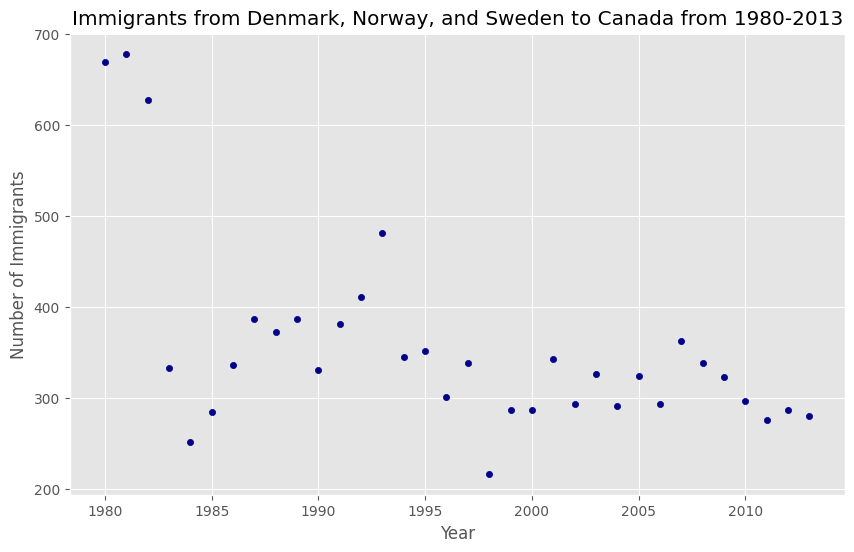

In [44]:
df_countries = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ["year", "total"]
df_total["year"] = df_total["year"].astype(int)
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")
plt.title("Immigrants from Denmark, Norway, and Sweden to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

# Bubble plots

In [51]:
df_can_t = df[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = "Year"
df_can_t.reset_index(inplace=True)
df_can_t

Country,Year,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,1,0,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704
5,1985,0,0,0,0,0,0,0,0,0,...,2819,962,845,1648,6543,514,3150,9564,1816,4211
6,1986,0,0,0,1,0,0,0,0,0,...,4808,1208,1838,1794,7074,691,4166,9470,1960,7150
7,1987,0,0,0,0,0,1,0,0,0,...,6931,2338,4447,2989,7705,1072,7360,21337,2643,10189
8,1988,0,0,0,0,0,0,1,0,0,...,9211,2805,2779,3273,6469,1334,8639,27359,2758,11522
9,1989,0,0,0,0,0,1,0,0,0,...,16025,2979,2758,3781,6790,2261,11865,23795,4323,10343


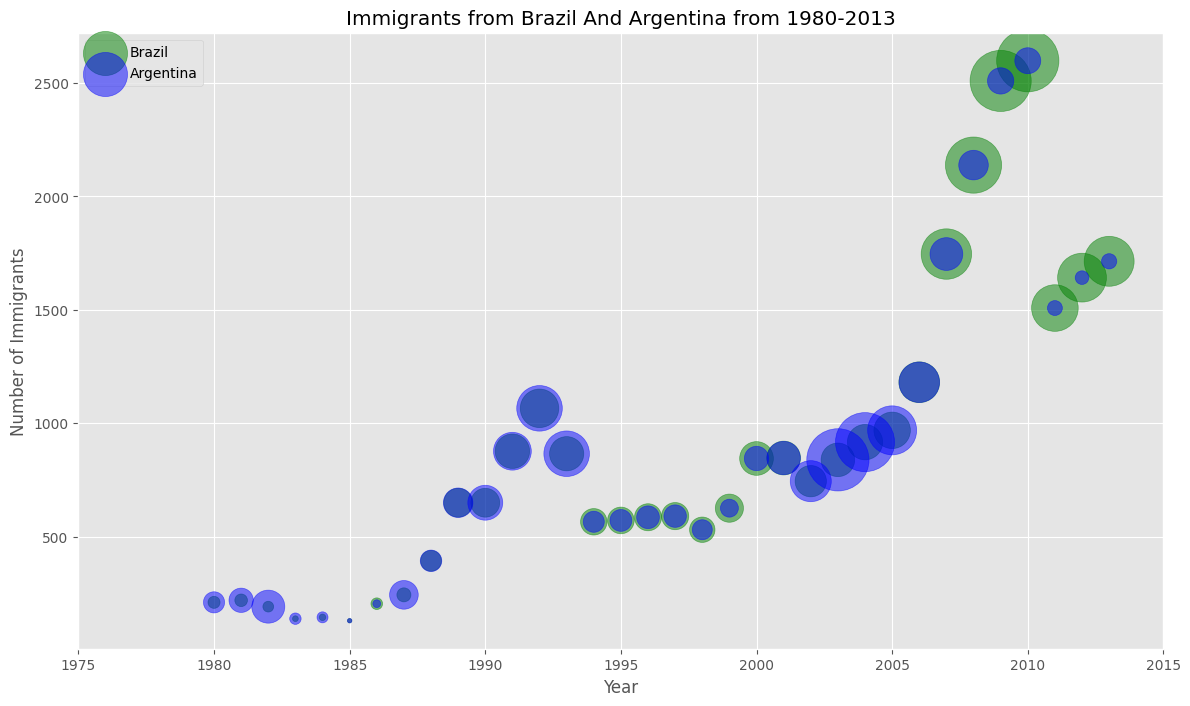

In [61]:
norm_brazil = (df_can_t["Brazil"] - df_can_t["Brazil"].min()) / (df_can_t["Brazil"].max() - df_can_t["Brazil"].min())
norm_argentina = (df_can_t["Argentina"] - df_can_t["Argentina"].min()) / (df_can_t["Argentina"].max() - df_can_t["Argentina"].min())

ax0 = df_can_t.plot(kind="scatter",
                    x="Year",
                    y="Brazil",
                    figsize=(14, 8),
                    alpha=0.5,
                    color="green",
                    s=norm_brazil*2000+10,
                    xlim=(1975, 2015))

ax1 = df_can_t.plot(kind="scatter",
                    x="Year",
                    y="Brazil",
                    figsize=(14, 8),
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina*2000+10,
                    ax=ax0)

ax0.set_ylabel("Number of Immigrants")
ax0.set_title("Immigrants from Brazil And Argentina from 1980-2013")
ax0.legend(["Brazil", "Argentina"], loc="upper left")

# Waffle chart

In [65]:
df_dsn = df.loc[["Denmark", "Norway", "Sweden"], :]
total_values = sum(df_dsn["Total"])
df_dsn

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [72]:
category_proportions = [(float(value)/total_values) for value in df_dsn["Total"]]
print(category_proportions)

width = 40
height = 10

total_sum_tiles = width * height

# Check number of tiles per category
tiles_per_category = [round(proportion * total_sum_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ": " + str(tiles))

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
Denmark: 129
Norway: 77
Sweden: 194


Waffle chart populated:


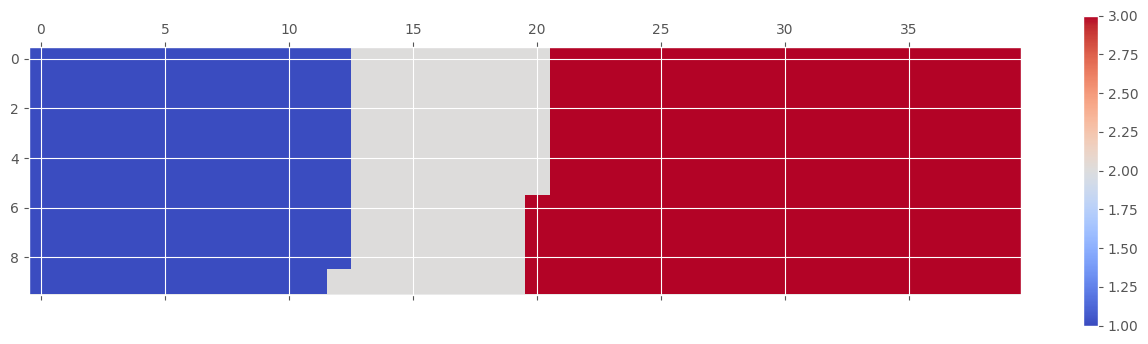

In [74]:
waffle_chart = np.zeros((height, width))
category_index = 0
tiles_index = 0

for col in range(width):
    for row in range(height):
        tiles_index += 1
        if tiles_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index

print("Waffle chart populated:")

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Word clouds

In [83]:
from wordcloud import STOPWORDS, WordCloud

In [79]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

--2025-11-25 01:43:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148570 (145K) [text/plain]
Saving to: ‘alice_novel.txt’

alice_novel.txt     100%[===================>] 145,09K   293KB/s    in 0,5s    

2025-11-25 01:43:58 (293 KB/s) - ‘alice_novel.txt’ saved [148570/148570]



In [84]:
alice_novel = open("./data/alice_novel.txt", "r").read()
alice_novel

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

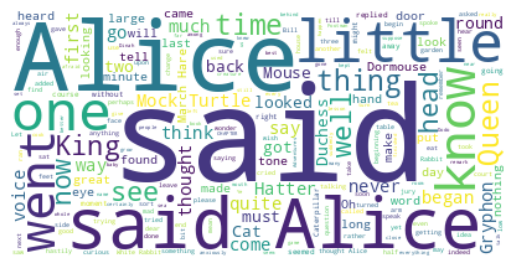

In [86]:
stopwords = set(STOPWORDS)
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords,    
)

alice_wc.generate(alice_novel)
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

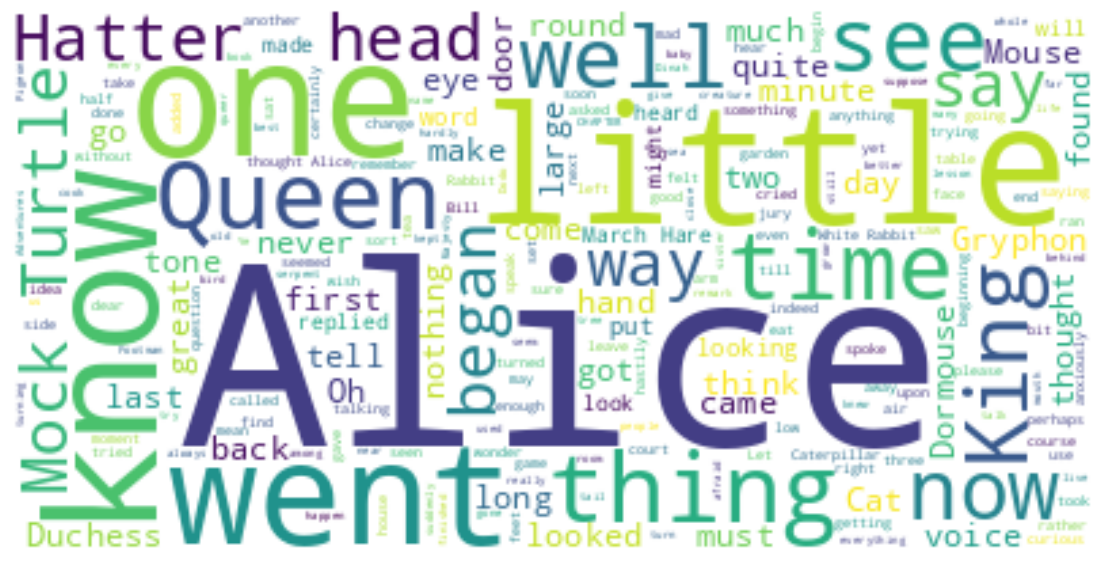

In [87]:
stopwords.add("said")

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
from PIL import Image

In [89]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png

--2025-11-25 01:51:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7339 (7,2K) [image/png]
Saving to: ‘alice_mask.png’

alice_mask.png      100%[===================>]   7,17K  --.-KB/s    in 0s      

2025-11-25 01:51:38 (2,74 GB/s) - ‘alice_mask.png’ saved [7339/7339]



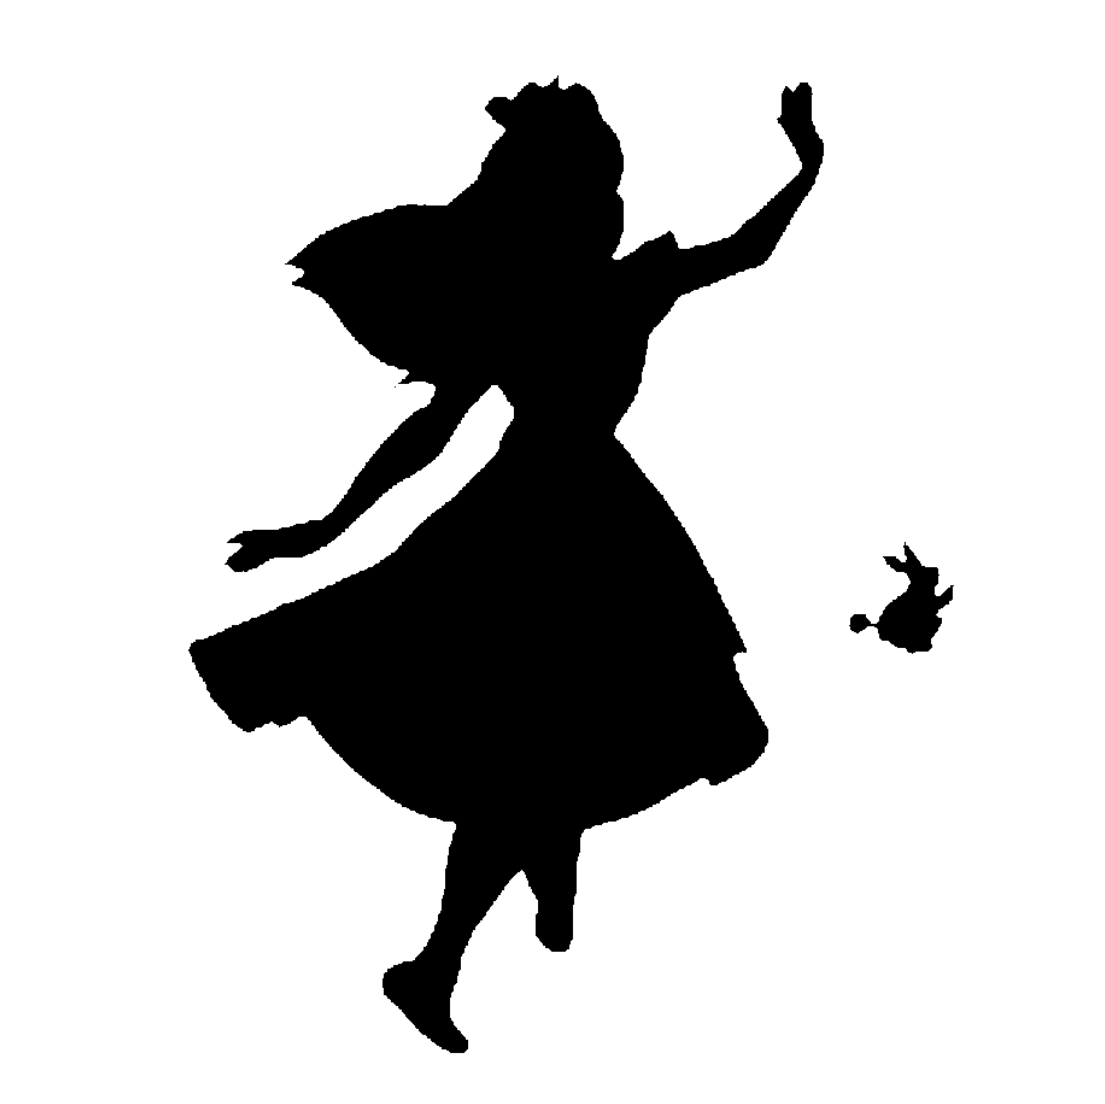

In [91]:
alice_mask = np.array(Image.open("./data/alice_mask.png"))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

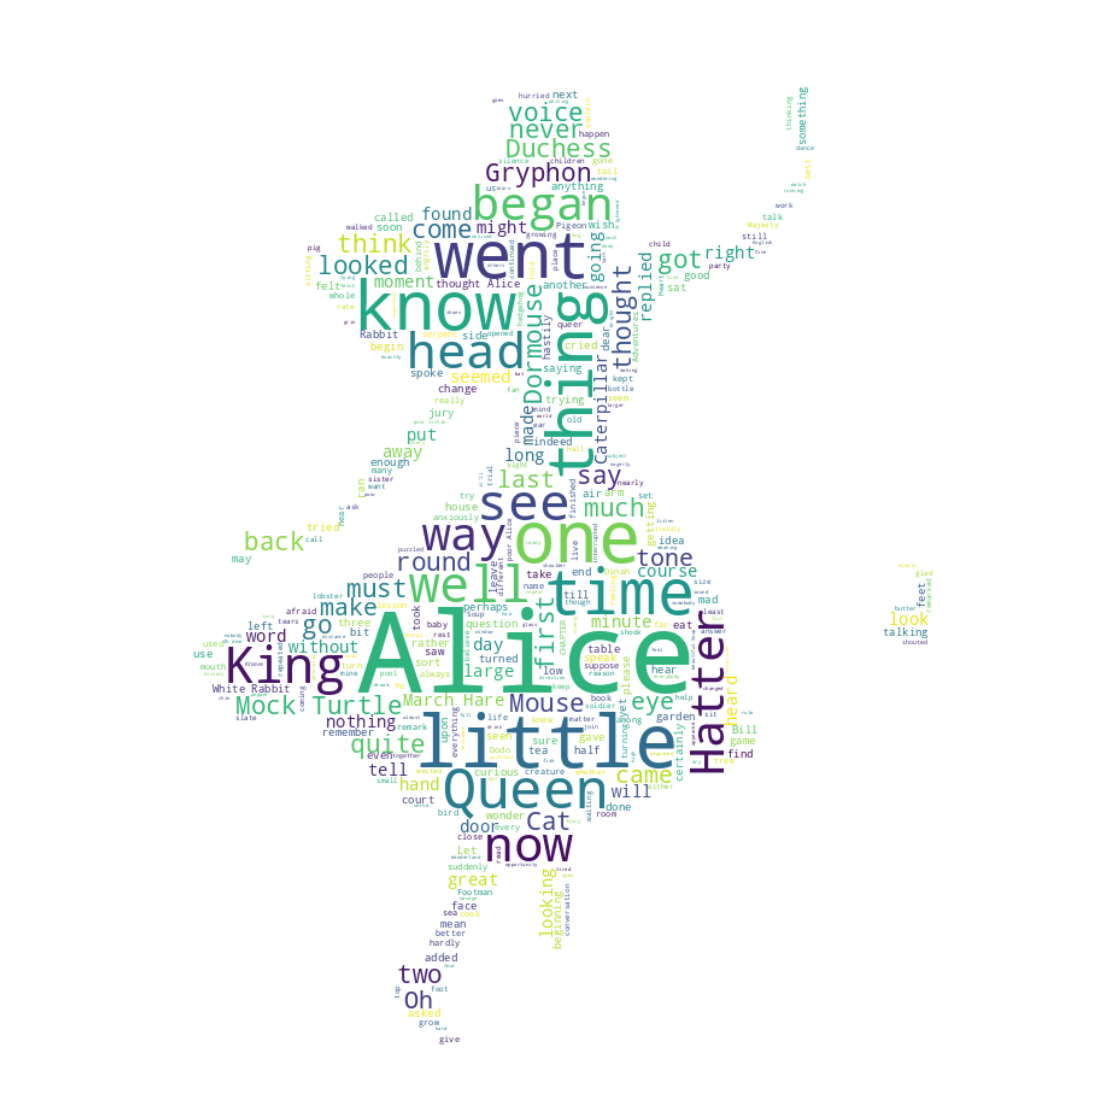

In [92]:
alice_wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figheight(18)
fig.set_figwidth(14)

plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()